# Project 1: Relationship of Terrorist network.


## Students

* Team: 29
* Students: Nicolas Bollier, Enea Figini, Axel Nilsson, Elias Le Boudec
* Dataset: Terrorist Relations

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import sparse
import matplotlib.patches as mpatches

### Loading the reference data

In [2]:
adjacency = np.load('../data/TerroristRel/adjacency_matrix.npy')

In [3]:
data = np.load('../data/TerroristRel/data.npy')

labels_raw = data[:,-4:]
labels = ((labels_raw[:,0] == 'colleague' )*1)+\
         ((labels_raw[:,1] == 'congregate')*2)+\
         ((labels_raw[:,2] == 'contact'   )*3)+\
         ((labels_raw[:,3] == 'family'    )*4)

colors     = ['red', 'blue', 'yellow', 'black']
node_color = []

for i in range(len(labels)):
    node_color.append(colors[labels[i]-1])
    

In [4]:
print("Nubmer of edges of the original dataset is:",np.sum(np.triu(adjacency)))

Nubmer of edges of the original dataset is: 8195


### First visualization of the reference data

In [5]:
graph = nx.from_scipy_sparse_matrix(sparse.csr_matrix(adjacency))

coords = nx.spring_layout(graph, k=.15, seed=3, iterations=100)

/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


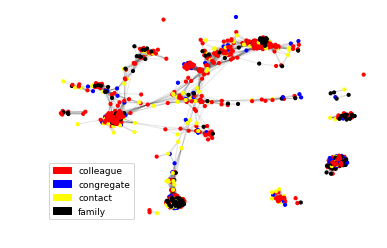

In [6]:
nx.draw_networkx_nodes(graph, coords, node_size=10, 
                       node_alpha=.2,node_color=node_color)
nx.draw_networkx_edges(graph, coords, alpha=0.1)
coll_patch  = mpatches.Patch(color=colors[0], label='colleague')
cong_patch  = mpatches.Patch(color=colors[1], label='congregate')
cont_patch  = mpatches.Patch(color=colors[2], label='contact')
fami_patch  = mpatches.Patch(color=colors[3], label='family')
plt.legend(handles=[coll_patch, cong_patch, cont_patch, fami_patch], loc=3, prop={'size': 9})
plt.axis('off')
plt.savefig('pics/graphRel.png', dpi = 250)
pass

## Objective

$\textit{To what extent is a network of terrorists similar to a social network ?}$



This dataset is the line-graph of a network of relationship between terrorists. Each node represents a connection between two individuals and each edge an individual. 
The label of each note relates to the nature of the relation between the two individual. It is one of the following four: 
Family - congregate - colleague -contact.
Two nodes are connected if they share one individual.

Our interest was to investigate the proprieties of the line graph as a relational network. As an organisation need interpersonal connection to function and studying the structure of the social organisation could yield valuable insight.
In “Line graphs as social networks”, M.Krawczyk found that on the basis of a study of an online social network, a social network could be well approximated by the line graph of a scale free network. If that propriety can be verified by our dataset, then we could gain information from the original graph from which the line graph originates.


## Proprieties of Social networks:

### Homophily:

Is the tendency of individuals to associate and bond with similar others.
### Transitivity:
$a \sim b \text{ and } b \sim c \text{ then } a \sim c$

### Application

In practice a scale free graph is all connected and we know from previous milestones that there are 13 connected components, therefore we know that the network cannot be modeled with only one scale free graph. Still, each component could be a separate structure with social network proprieties.

Here we will extract the largest connected component from the dataset:

In [7]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    # For convenience
    A = adjacency
    N = A.shape[0]

    # Number of components initialization
    nComponents = 1
    
    # Mapping between nodes and components:
    # Node ~ row index in range(N) mapped to a integer
    # (the id of the component)
    componentMapping = np.zeros([N,1])
    componentMapping[0] = 1
    
    # First, find which node belongs to which component
    # Starting from node 2, look for nodes connected to each node
    for i in range(1, N):
        for j in range(N):
            # Check all neighbors
            if i != j and A[i,j] != 0:
                # We found a neighbor!
                break
        if j == N-1 or componentMapping[j] == 0:
            # Either the node is isolated (j == N-1),
            # or the neighbor is not mapped to a component yet.
            # Hence, we need to create a new component.
            nComponents = nComponents + 1
            currentComponent = nComponents
        else:
            # We found a neighbor already mapped to a component.
            currentComponent = componentMapping[j]
        componentMapping[i] = currentComponent
    
    # Now, For each component, build the adjacency matrix:
    adjacencyMatricesList = list();
    for component in range(1,nComponents+1):
        # Size of component
        N_component = np.sum(componentMapping == component);
        indices = componentMapping == component;
        adjacencyMatricesList.append(A[indices@indices.T].reshape((N_component,N_component)))
                
    return adjacencyMatricesList, componentMapping

In [8]:
largestConnectedComponent = max(find_components(adjacency)[0], key = len)
NlargestConnectedComponent = len(largestConnectedComponent)

In [9]:
print("Largest connected component has paramater",np.size(largestConnectedComponent,0),"nodes and",np.sum(np.triu(largestConnectedComponent)), "edges")  

Largest connected component has paramater 116 nodes and 1484 edges


/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


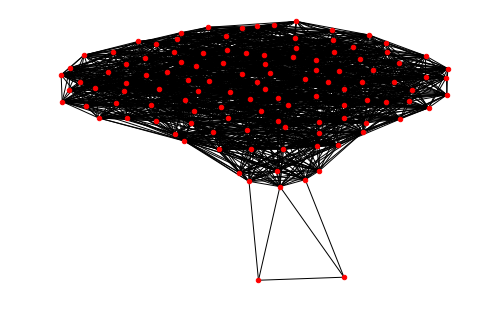

In [10]:
LarG = nx.Graph(largestConnectedComponent)
nx.draw_spring(LarG,node_size=20,node_alpha=1., edge_alpha=0.1)

### Proprieties of line graphs

For a graph G(n,m) with n vertices and m edges, the number of vertices of the line graph L(G) is m, and the number of edges of L(G) is half the sum of the squares of the degrees of the vertices in G, minus m.

$ G(n,m) $   gives  a line graph : $L(G) ( m , \frac{\sum d_i^2}{2} -m)$

We know that the largest connected component has n = 116 nodes and 1484 Edges. Therefore the inital graph has m= 116 edges but, in order to make a scale free graph, we need to have an idea of the number of inital nodes.

$\sum d_i^2 = (1484 +116 )*2 = 3200$

Therefore The average degree of one node of the original dataset is:

$ \bar{d_i} = \sqrt{\frac{3200}{116}} = 5,25$

Also, we know that $\#Edges * \frac{average\ degree}{2} = \#Edges$. Thus we can infer that in the original dataset there is:

$N = \frac{2*116}{5,25} = 44,17$ nodes

## Construction of a scale free-network

Scale free network have the following parameters:
$\alpha, \beta, \gamma$ and $\alpha+ \beta+ \gamma = 1$ 

$\alpha$ – Probability for adding a new node connected to an existing node chosen randomly according to the in-degree distribution.

$\beta$ – Probability for adding an edge between two existing nodes. One existing node is chosen randomly according the in-degree distribution and the other chosen randomly according to the out-degree distribution.

$\gamma$ – Probability for adding a new node conected to an existing node chosen randomly according to the out-degree distribution.

#### Parameter selection

Because we know that social networks have the proprieties of transitivity and homophily, we will chose a $\beta$ that is significantly larger than $\alpha$.
We use the number of nodes found previously for the total number of nodes in the graph as n = 44

In [11]:
n = 44
GD = nx.scale_free_graph(n, alpha=0.22, beta=0.62, gamma=0.16, delta_in=.1, delta_out=0, create_using=None, seed=1)
G= GD.to_undirected()
print("The number of nodes of the scale free Network is:",n,"and the number of edges:",G.number_of_edges())

The number of nodes of the scale free Network is: 44 and the number of edges: 95


/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


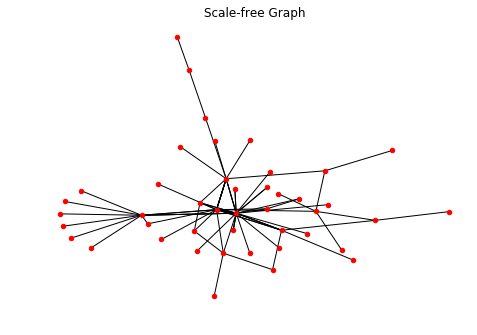

In [12]:
nx.draw_spring(G,node_size=20,node_alpha=1., edge_alpha=0.1)
plt.title('Scale-free Graph')
plt.savefig('pics/graphScaleFree.png',dpi = 600)

In [13]:
L = nx.line_graph(G)
AdjL = nx.adjacency_matrix(L)
print("The line graph of the scale free network has",G.number_of_edges(),"nodes and", L.number_of_edges(),"edges.")

The line graph of the scale free network has 95 nodes and 1507 edges.


/Users/axel/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


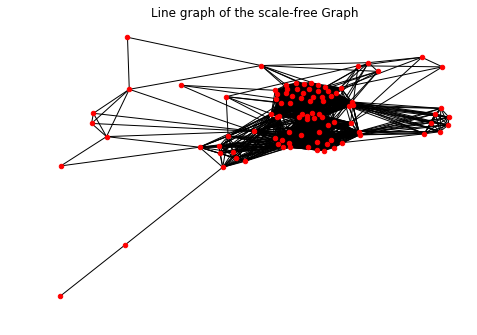

In [14]:
nx.draw_spring(L,node_size=20,node_alpha=1., edge_alpha=0.1)
plt.title('Line graph of the scale-free Graph')
plt.savefig('pics/graphLineScaleFree.png',dpi = 600)

## Degree distribution comparison

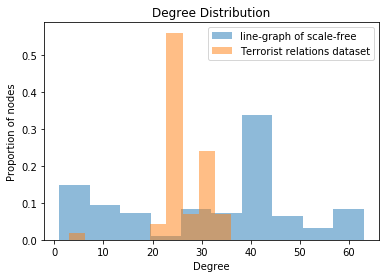

In [35]:
degreeL = np.squeeze(np.asarray(AdjL.sum(0)))
weightsL = np.ones_like(degreeL) / len(degreeL)
plt.hist(degreeL, alpha=0.5, weights=weightsL);

degree = largestConnectedComponent.sum(0)
weights = np.ones_like(degree) / len(degree)
plt.hist(degree, alpha=0.5, weights=weights);

#handles, labels = plt.ax.get_legend_handles_labels()
plt.xlabel('Degree')
plt.ylabel('Proportion of nodes')
plt.title('Degree Distribution')
plt.legend(('line-graph of scale-free','Terrorist relations dataset'))
pass

plt.savefig('pics/DegreeDiff.png',dpi = 600)


# Conclusion

We observe that the degree distribution of the two line graphs are significantly different. Therefore we cannot conclude that terrorist organisation are connected in ways that resemble social networks. Thus their interaction are significantly different than social interactions wether they are relational or professional.